#Importing Necessary Libraries

In [50]:
# New Section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
import statsmodels.api as sm
import scipy.stats as stats

#Importing Dataset and plotting Histogram

(array([3.0000e+00, 2.6000e+01, 9.3000e+01, 3.1200e+02, 8.9400e+02,
        2.2230e+03, 4.5280e+03, 7.6510e+03, 1.1220e+04, 1.4063e+04,
        1.5298e+04, 1.4252e+04, 1.1545e+04, 8.0290e+03, 4.8960e+03,
        2.7310e+03, 1.3530e+03, 5.7500e+02, 2.0200e+02, 7.1000e+01,
        2.8000e+01, 5.0000e+00, 2.0000e+00]),
 array([125., 130., 135., 140., 145., 150., 155., 160., 165., 170., 175.,
        180., 185., 190., 195., 200., 205., 210., 215., 220., 225., 230.,
        235., 240.]),
 <BarContainer object of 23 artists>)

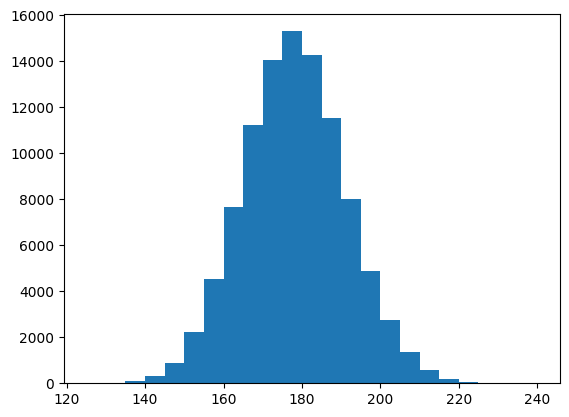

In [51]:
df = pd.read_csv('2 1-filter and 1 lakh.csv',  names=['y','x'])
df.head()
sample=df
np_X=np.array(sample['x'])
plt.hist(np_X,bins=[125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240])

In [52]:
print(df.describe())

                   y              x
count  100000.000000  100000.000000
mean       24.999750     177.602270
std        14.433829      13.043624
min         0.000000     127.000000
25%        12.499875     169.000000
50%        24.999750     177.000000
75%        37.499625     186.000000
max        49.999500     235.000000


#Scatter Plot

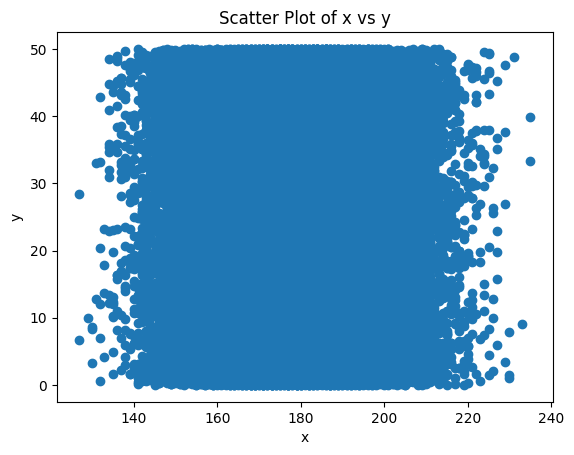

In [54]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.show()

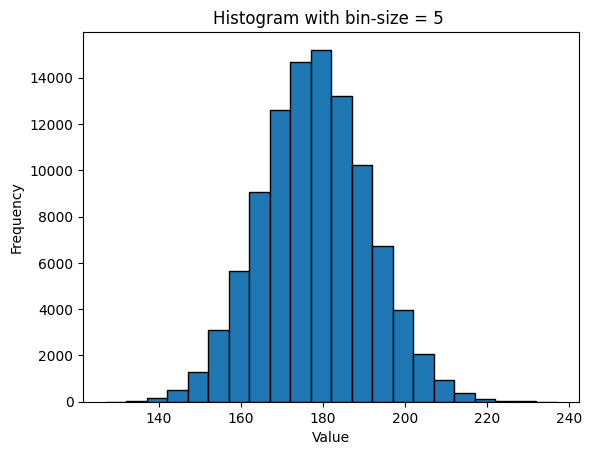

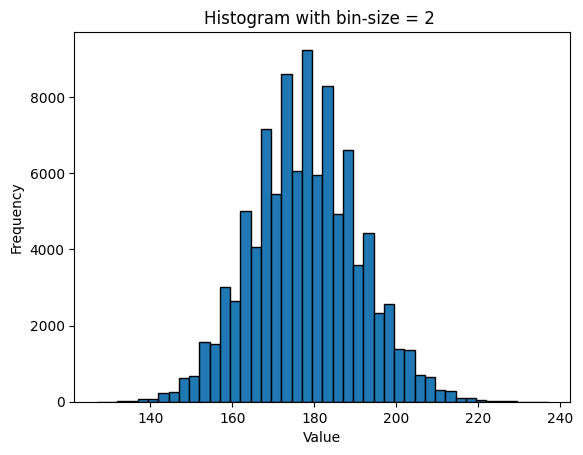

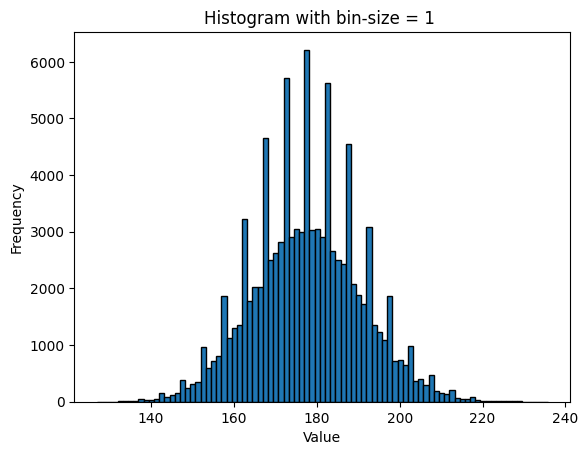

In [55]:
w=5.0
while(w>=1):
  plt.hist(np_X, edgecolor='black', bins=np.arange(min(np_X), max(np_X) + w, w))
  plt.title("Histogram with bin-size = %i " %w)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  w=w/2

#Correlation Heatmap

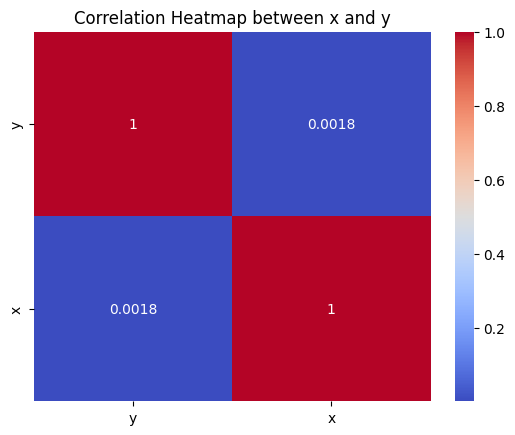

In [56]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between x and y')
plt.show()

## Normalizing the data

In [57]:
X = np.array(sample['x'])
y = np.array(sample['y'])


In [58]:
# StandardScaler().fit_transform(X.reshape(-1,1))
X = StandardScaler().fit_transform(X.reshape(-1,1))

In [59]:
X = X.reshape(-1,1)

In [60]:
X

array([[-0.12283994],
       [-0.35283853],
       [-0.04617375],
       ...,
       [ 1.64048253],
       [-0.81283569],
       [ 0.41382342]])

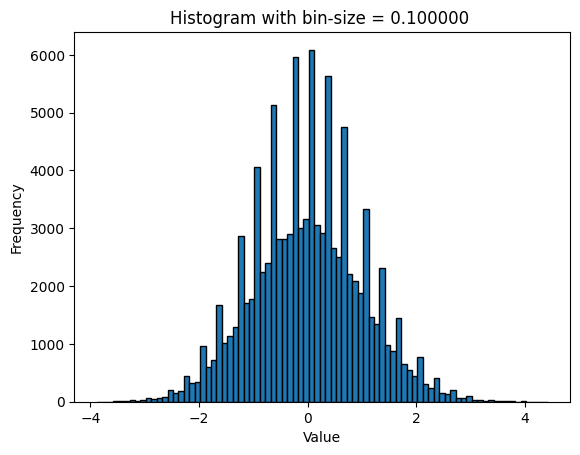

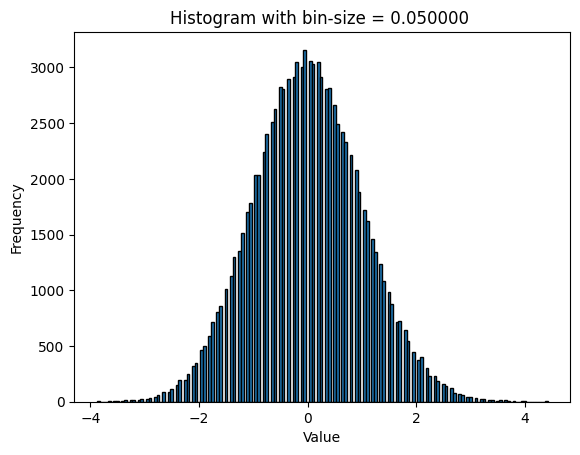

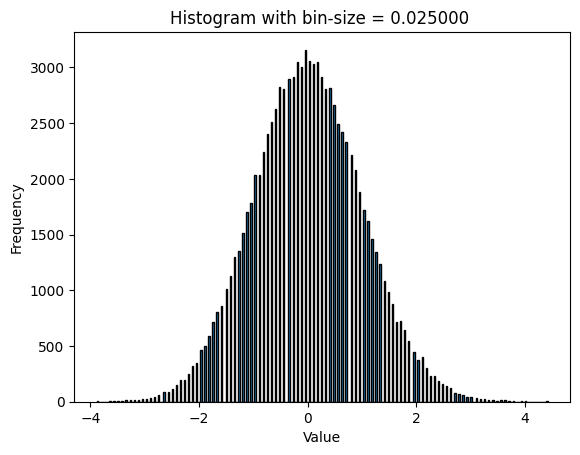

In [61]:
t=10

while(w>=0.05):
  w=float(t/100)
  plt.hist(X, edgecolor='black', bins=np.arange(min(X), max(X) + w, w))
  plt.title("Histogram with bin-size = %f " %w)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  t=t/2

In [62]:
X = MinMaxScaler().fit_transform(X.reshape(-1,1))

In [63]:
X

array([[0.4537037 ],
       [0.42592593],
       [0.46296296],
       ...,
       [0.66666667],
       [0.37037037],
       [0.51851852]])

#Density Plot

<ipython-input-64-77551ddd3449>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X, shade=True)
<ipython-input-64-77551ddd3449>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, shade=True)


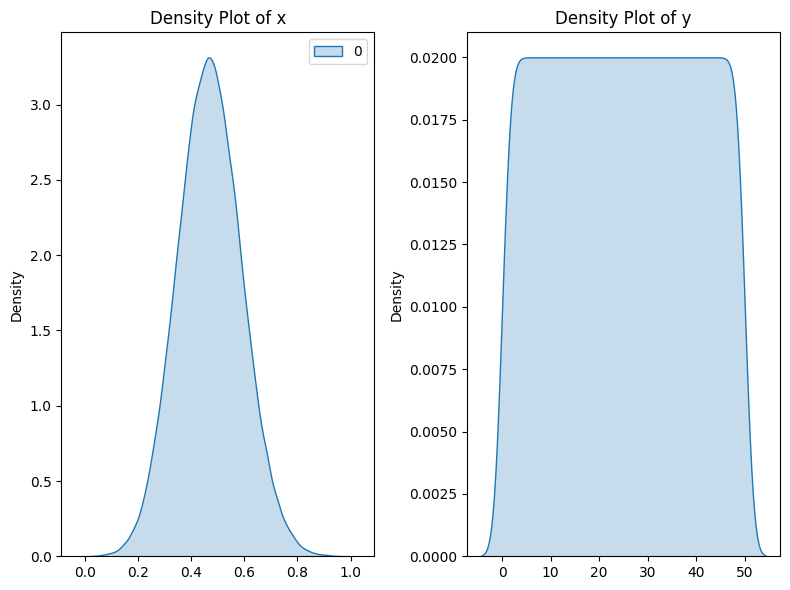

In [64]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(X, shade=True)
plt.title('Density Plot of x')

plt.subplot(1, 2, 2)
sns.kdeplot(y, shade=True)
plt.title('Density Plot of y')

plt.tight_layout()
plt.show()

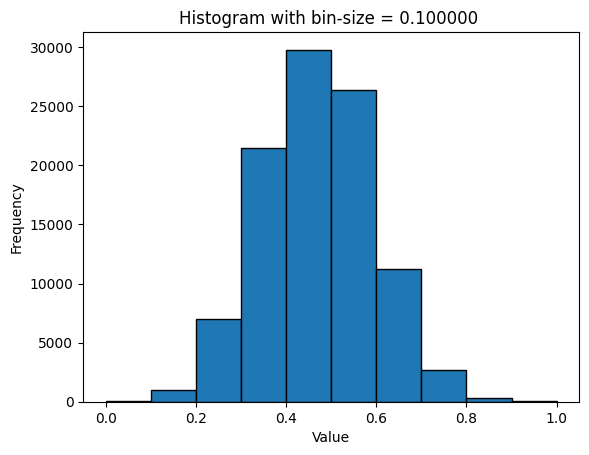

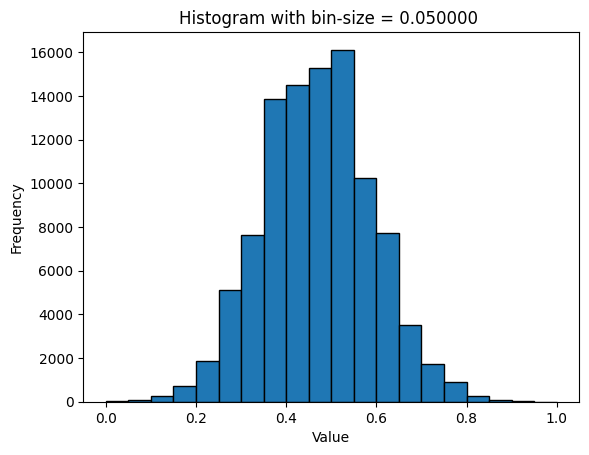

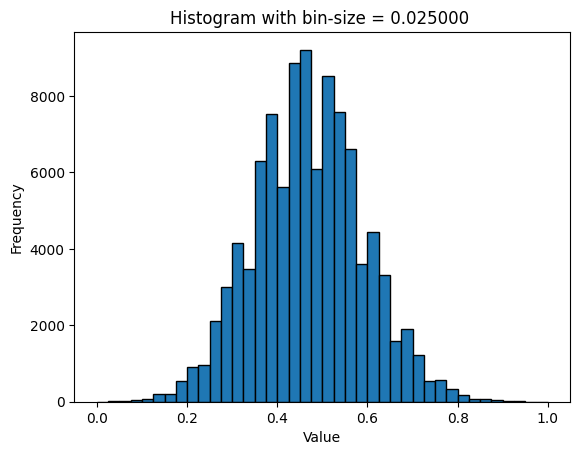

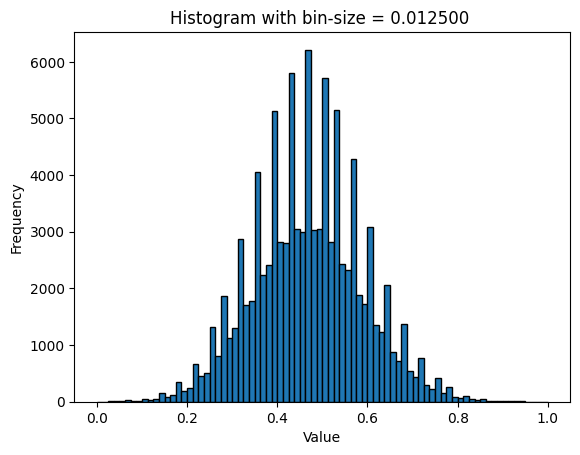

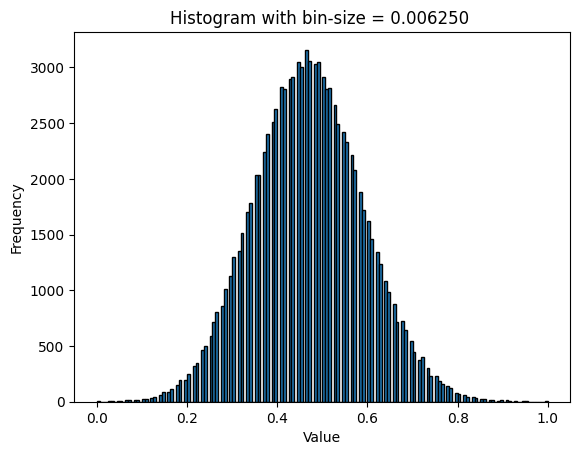

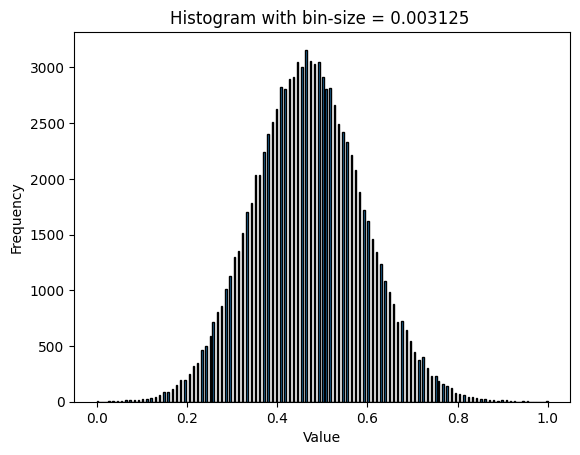

In [65]:
t=10

while(w>=0.005):
  w=float(t/100)
  plt.hist(X, edgecolor='black', bins=np.arange(min(X), max(X) + w, w))
  plt.title("Histogram with bin-size = %f " %w)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  t=t/2

In [66]:
data = sample['x']

In [67]:
ecdf = sm.distributions.ECDF(data)

In [68]:
x = np.linspace(min(data), max(data))
y = ecdf(x)

#Cummulative Distribution Function

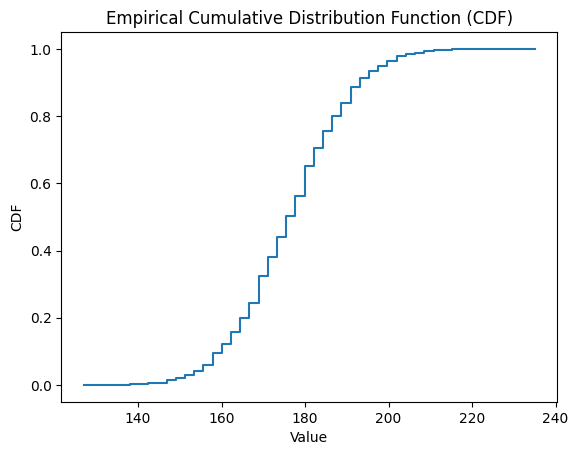

In [69]:
plt.step(x, y)
plt.title("Empirical Cumulative Distribution Function (CDF)")
plt.xlabel('Value')
plt.ylabel('CDF')
plt.show()

#QQ Plot

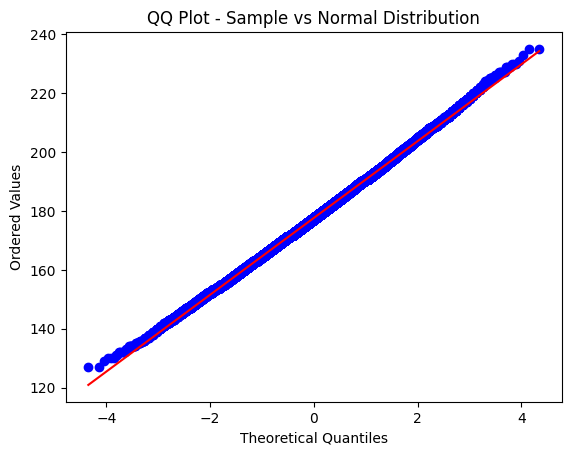

In [70]:
data = sample['x']

stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot - Sample vs Normal Distribution")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

#Gaussian Distribution

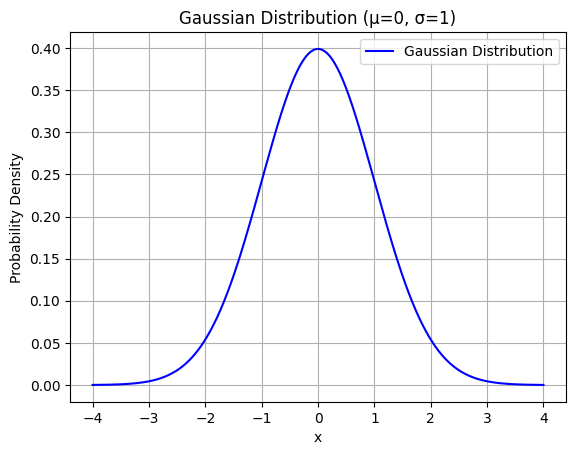

In [72]:
mu = 0
sigma = 1

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, label='Gaussian Distribution', color='blue')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution (μ=0, σ=1)')
plt.legend()
plt.grid(True)
plt.show()